In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

- CustomerID provides no meaning that the model can use to find clusters. It's useless and would make the model learning inaccurate.
- In unsupervised learning, there is no target variable because the outcome is finding structure within data.
- Adding weak or noisy features like age and gender could make the model inaccurate, because clustering is sensitive to features.
- If those features were to affect customer purchasing behavior, they would be useful to include in the model learning.

In [4]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
X.shape

(200, 2)

In [6]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

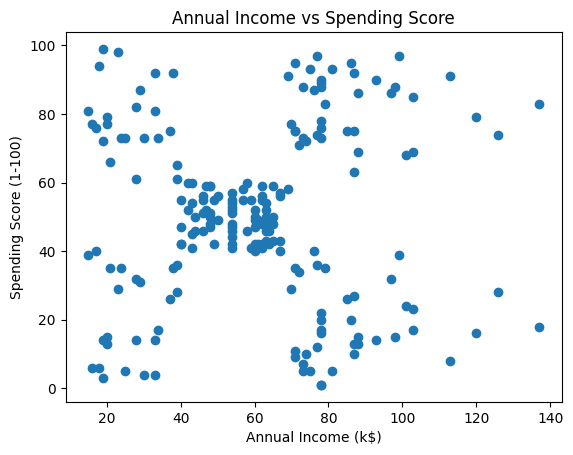

In [ ]:
plt.figure()
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')

plt.show()

We can clearly see that there 5 different clusters:
- Top right
- Top left
- Bottom right
- Bottom left
- Middle

It's important to visualize before applying clustering to make sure our intuition matches the result of the algorithm to find the best K value for clustering.

In [8]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
# elbow curve

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',
                    random_state=42,
                    n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

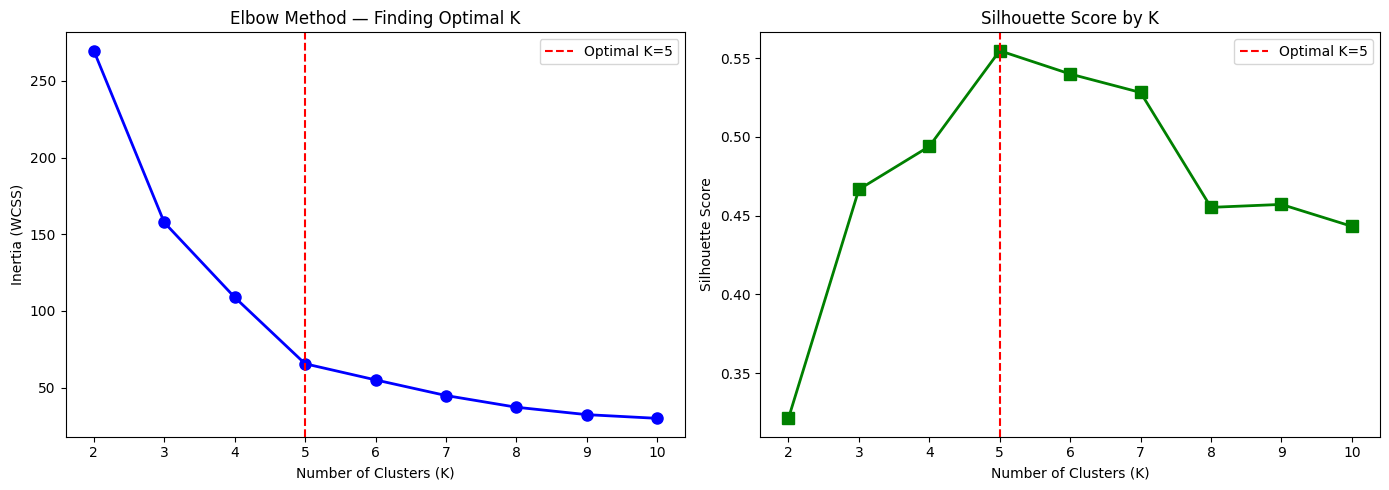

Best K by Silhouette Score:5


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].set_title('Elbow Method — Finding Optimal K')
axes[0].axvline(x=5, color='red', linestyle='--', label='Optimal K=5')
axes[0].legend()

axes[1].plot(K_range, silhouette_scores, 'gs-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by K')
axes[1].axvline(x=5, color='red', linestyle='--', label='Optimal K=5')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Best K by Silhouette Score:{K_range[silhouette_scores.index(max(silhouette_scores))]}")

- Inertia is a measure of how tightly grouped the clusters are.
- I chose K=5 because it's the point where more K makes no major difference
- If K is too small there would be too few segments
- If K is too big there would be an over-segmentation of the data

In [11]:
optimal_k = 5

kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"Final Inertia:{kmeans.inertia_:.2f}")
print(f"Silhouette Score:{silhouette_score(X_scaled, labels):.4f}")
print(f"Cluster sizes:{np.bincount(labels)}")

Final Inertia:65.57
Silhouette Score:0.5547
Cluster sizes:[81 39 22 35 23]


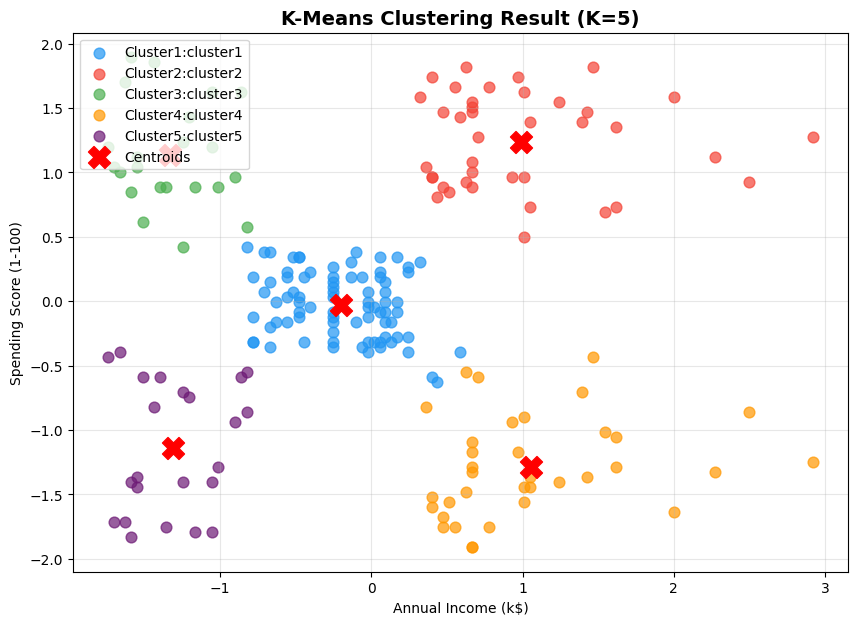

In [18]:
colors = ['#2196F3', '#F44336', '#4CAF50', '#FF9800', "#6D1A75"]
cluster_names = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']

plt.figure(figsize=(10, 7))

for cluster_id in range(optimal_k):
    mask = labels == cluster_id
    plt.scatter(
        X_scaled[mask, 0], X_scaled[mask, 1],
        c=colors[cluster_id],
        label=f'Cluster{cluster_id + 1}:{cluster_names[cluster_id]}',
        alpha=0.7,
        s=60
    )
    
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red', marker='X', s=250,
    zorder=5, label='Centroids'
)

plt.title(f'K-Means Clustering Result (K={optimal_k})', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

The clusters look well separated, and it matches our intuition from the first visualization.

The centroids are located near the center of their groups.

If some clusters slightly overlap then the clustering is fine.

There are 5 clusters.

Cluster 5 represents people who don't make much money annually, and as a result, don't spend much money
Cluster 4 represents people who make a lot annually but don't spend much anyways
Cluster 3 represents people who don't make much annually but buy a lot
Cluster 2 represents people who make a lot of money annually and spend a lot
Cluster 1 represents people who make an average amount of money annually and spend an average amount of money

Cluster 1: Average Buyers
Cluster 2: Premium Customers
Cluster 3: Impulsive Buyers
Cluster 4: Careful Rich Customers
Cluster 5: Budget Customers

For cluster 2, I would often advertise expensive products to them, without discounts, since they're rich and spend a lot.
For cluster 3, I would often advertise products that are affordable, since they'd buy them impulsively as long as they're in their budget.
For cluster 4, I would advertise products to them the same way as cluster 2, but make sure that the copywriting of the ad is very convincing and gets them to buy
For cluster 5, I would do the same as cluster 4, but with affordable products
For cluster 1, Normal ads for middle-priced products